<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План работы</a></span><ul class="toc-item"><li><span><a href="#Часть-1.-Приоретизация-гипотез" data-toc-modified-id="Часть-1.-Приоретизация-гипотез-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Часть 1. Приоретизация гипотез</a></span></li><li><span><a href="#Часть-2.-Анализ-А/В-теста" data-toc-modified-id="Часть-2.-Анализ-А/В-теста-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Часть 2. Анализ А/В-теста</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Принятие решений в бизнесе

## Цель проекта

<div>

* Для крупного интернет магазина нужно приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга.

* Провести анализ результатов проведенного А/В-тестирования.

</div>

## Описание данных

Файл со списком гипотез <code>hypothesis.csv</code>
<div>

* <code>Hypothesis</code> — краткое описание гипотезы;

* <code>Reach</code> — охват пользователей по 10-балльной шкале;

* <code>Impact</code> — влияние на пользователей по 10-балльной шкале;

* <code>Confidence</code> — уверенность в гипотезе по 10-балльной шкале;
    
* <code>Efforts</code> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
</div>

Файл с информацией о заказах пользователей в интернет-магазине <code>orders.csv</code>
<div>

* <code>transactionId</code> — идентификатор заказа;

* <code>visitorId</code> — идентификатор пользователя, совершившего заказ;

* <code>date</code> — дата, когда был совершён заказ;

* <code>revenue</code> — выручка заказа;
    
* <code>group</code> — группа A/B-теста, в которую попал заказ.
    
</div>

Файл с информацией о посещении пользователями интернет-магазина <code>visitors.csv</code>
<div>

* <code>date</code> — дата;

* <code>group</code> — группа A/B-теста;

* <code>visitors</code> — количество пользователей в указанную дату в указанной группе A/B-теста

</div>

## План работы

Исследование пройдет в два основных этапа:

<div>

* <b>Часть 1. Приоретизация гипотез</b>
    * Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    * Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    * Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

* <b>Часть 2. Проанализируйте А/В-тест</b>
    * Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    * Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    * Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    * Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
    * Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
    * Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    * Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    * Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    * Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    * Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    * Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    * Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    * Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    * Примите решение по результатам теста и объясните его. Варианты решений:
        * 1. Остановить тест, зафиксировать победу одной из групп.
        * 2. Остановить тест, зафиксировать отсутствие различий между группами.
        * 3. Продолжить тест. 



    
</div>

### Часть 1. Приоретизация гипотез

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.display.max_colwidth = 150

In [2]:
pth1 = '/datasets/hypothesis.csv'
pth2 = 'hypothesis.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypothesis = pd.read_csv(pth2)
else:
    print('Что-то пошло не так')

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Применим фреймворк ICE для приоритизации гипотез. Отсортируем по убыванию приоритета

In [4]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'])
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [5]:
hypothesis.loc[8,'Hypothesis']

'Запустить акцию, дающую скидку на товар в день рождения'

По фреймворку ICE у нас на первом месте гипотеза 8 - 'Запустить акцию, дающую скидку на товар в день рождения'. 

Применим фреймворк RICE для приоритизации гипотез. Отсортируем по убыванию приоритета

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
hypothesis.loc[7, 'Hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

По фреймворку RICE у нас на первом месте гипотеза 7 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. 

In [8]:
hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


Приоретизация гипотез при спользовании фрейморка RICE изменилась, так как помимо трех компонентов из ICE (Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу), у нас добавился четвертый компонент Reach — скольких пользователей затронет изменение, которое мы хотите внести.

### Часть 2. Анализ А/В-теста

Прочтём данные из файлов с результатами A/B-тестирования: 


In [9]:
pth1 = '/datasets/orders.csv'
pth2 = 'orders.csv'

if os.path.exists(pth1):
    orders = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    orders = pd.read_csv(pth2, sep=',')
else:
    print('Что-то пошло не так')

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
pth1 = '/datasets/visitors.csv'
pth2 = 'visitors.csv'

if os.path.exists(pth1):
    visitors = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    visitors = pd.read_csv(pth2, sep=',')
else:
    print('Что-то пошло не так')

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
#Проверим датасеты на наличие дубликатов
display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

In [14]:
#Проверим данные на количество пропусков
display(visitors.isna().sum())
orders.isna().sum()

date        0
group       0
visitors    0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Перед началом анализа А/В-теста, важно ответить на такие вопросы:

<div>

* Сколько у нас групп в А/В тесте;

* Даты начала и окончания теста;

* Сколько уникальных пользователей в каждой группе.
    
</div>

In [15]:
#Количество групп в тесте
display(visitors.group.nunique())
orders.group.nunique()

2

2

In [16]:
#Даты проведения теста
display(visitors.date.sort_values(ascending=False))
orders.date.sort_values(ascending=False)

61   2019-08-31
30   2019-08-31
29   2019-08-30
60   2019-08-30
28   2019-08-29
        ...    
33   2019-08-03
32   2019-08-02
1    2019-08-02
0    2019-08-01
31   2019-08-01
Name: date, Length: 62, dtype: datetime64[ns]

956    2019-08-31
1013   2019-08-31
957    2019-08-31
958    2019-08-31
959    2019-08-31
          ...    
142    2019-08-01
141    2019-08-01
140    2019-08-01
139    2019-08-01
55     2019-08-01
Name: date, Length: 1197, dtype: datetime64[ns]

Тест начался 1 августа 2019, а сейчас 31 августа 2019. В конце исследования будет принято решения, останавливать его или нет

In [17]:
#Количество уникальных пользователей в каждой группе
unique_visitors_A = pd.Series(orders[orders['group']=='A']['visitorId'].unique())
unique_visitors_B = pd.Series(orders[orders['group']=='B']['visitorId'].unique())

display(unique_visitors_A.count(), unique_visitors_B.count())

503

586

In [18]:
#Проверим, есть ли пользователи, которые встречаются в обеих группах
ab_visitors = unique_visitors_A[(unique_visitors_A.isin(unique_visitors_B))]
ab_visitors.count()

58

Видим, что у нас есть 58 пользователей, встречающихся в обоих группах теста. Возможно, произошла ошибка при сборе данных. Лучше избавиться от таких дублей, т.к. они не позволят нам провести корректные сравнения

In [19]:
orders = orders[np.logical_not(orders['visitorId'].isin(ab_visitors))].reset_index()

In [20]:
#Количество уникальных пользователей в каждой группе после удаления дубликатов
unique_visitors_A = pd.Series(orders[orders['group']=='A']['visitorId'].unique())
unique_visitors_B = pd.Series(orders[orders['group']=='B']['visitorId'].unique())

display(unique_visitors_A.count(), unique_visitors_B.count())

445

528

Группы не очень сбалансированы, разница между ними в 83 пользователя

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм <code>cumulativeData</code> со столбцами:
<div>

* <code>date</code> — дата;

* <code>group</code> — группа A/B-теста (A или B);

* <code>orders</code> — кумулятивное количество заказов на указанную дату в указанной группе;

* <code>buyers</code> — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
    
* <code>revenue</code> — кумулятивная выручка на указанную дату в указанной группе (средний чек);
    
* <code>visitors</code> — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.
    
</div>

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[
    np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])
].agg({
    'date' : 'max', 
    'group' : 'max', 
    'transactionId' : 'nunique', 
    'visitorId' : 'nunique', 
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


<b>Построим график куммулятивной выручки по группам</b>

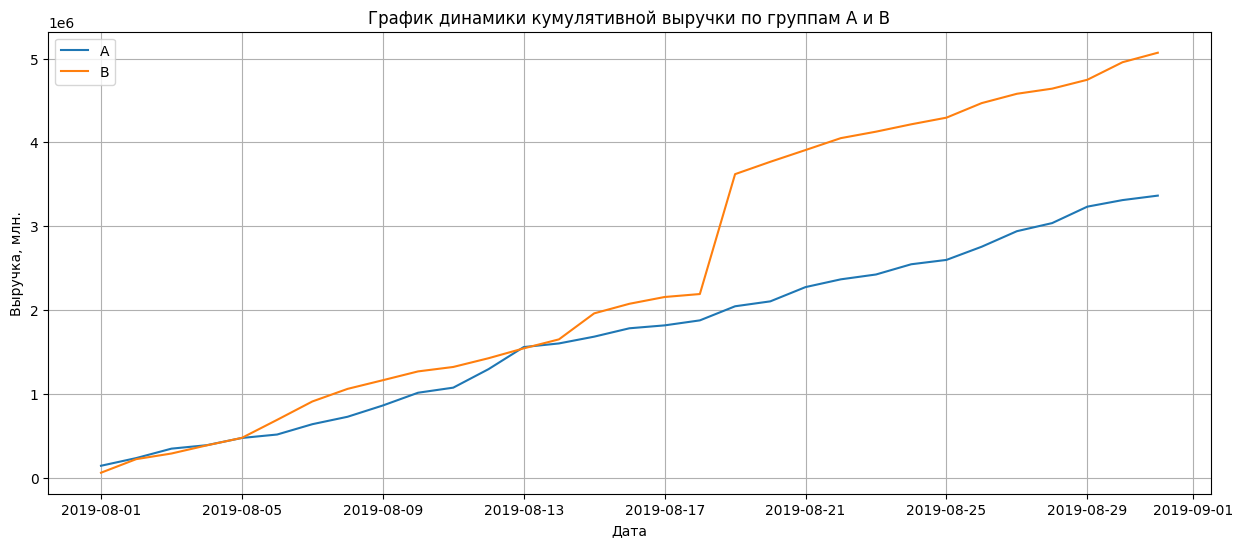

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,6));

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График динамики кумулятивной выручки по группам А и В')

plt.ylabel("Выручка, млн.")

plt.xlabel("Дата")

plt.grid()

plt.legend()

plt.show()

Видим, что куммулятиваня выручка в группе А растет линейно. Она меньше, чем выручка из группы В. Однако, в группе В видим резкий скачок выруки в районе 18 августа. Это может быть связано с вслпеском числа заказов, или о появлении дорогих заказрв в выборке

<b>Построим график кумулятивного среднего чека по группам</b>

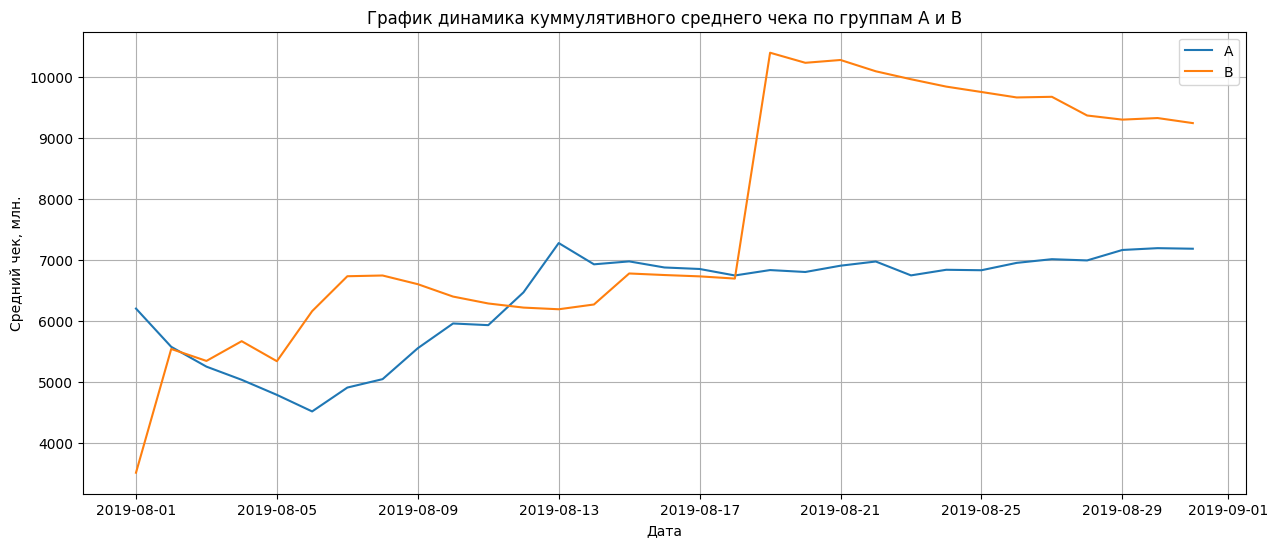

In [23]:
plt.figure(figsize=(15,6));

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График динамика куммулятивного среднего чека по группам А и В')

plt.ylabel("Средний чек, млн.")

plt.xlabel("Дата")

plt.grid()

plt.legend()

plt.show()

Средний чек в группее А на определенным отрезке времени стабилизировался, в то время как в группе В 18 агвуста совершил резкий скачок вверх. Еще один аргумент в пользу дорогой покупки

<b>Построим график относительного изменения кумулятивного среднего чека группы B к группе A</b>

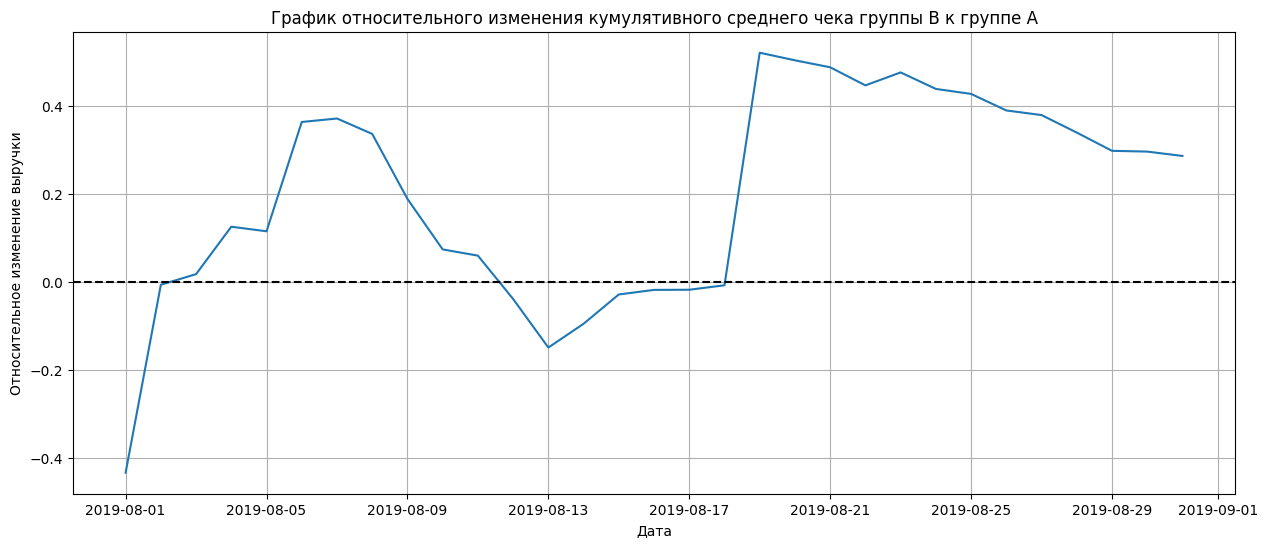

In [24]:
plt.figure(figsize=(15,6));

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.ylabel("Относительное изменение выручки")

plt.xlabel("Дата")

plt.grid()

plt.show()

В нескольких точках график различия между сегментами резко «скачет». Определенно есть крупные заказы и выбросы

<b>Построим график кумулятивного среднего количества заказов на посетителя по группам</b>

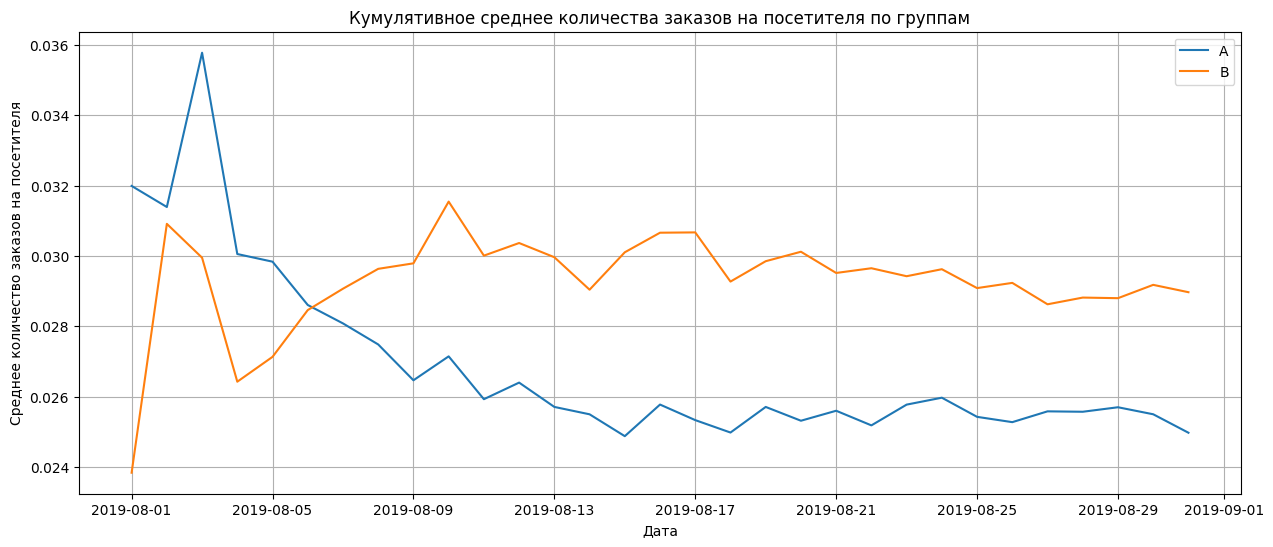

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,6));

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Кумулятивное среднее количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.ylabel('Среднее количество заказов на посетителя')

plt.grid()

plt.show()

На графике видим, что какое-то время показатель кумулятивного среднего количества заказов на посетителя колебался, но затем выровнялся для обеих групп. Показатель в группе В выше, чем в группе А.

<b>Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</b>

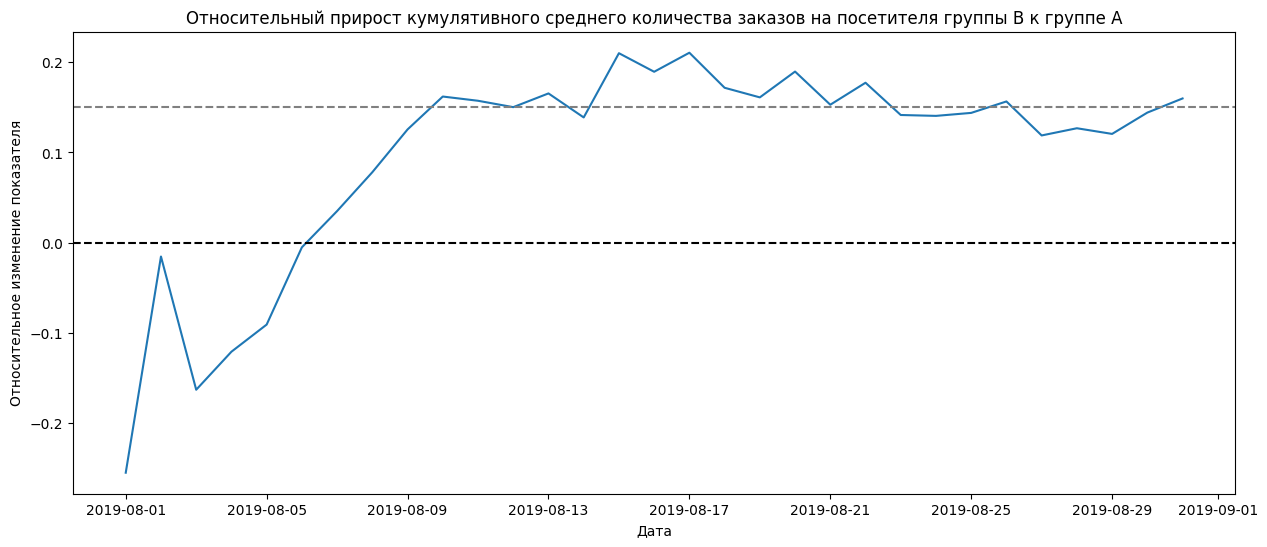

In [26]:
mergedCumulativeConversions  = (
    cumulativeDataA[['date','conversion']]
    .merge(
        cumulativeDataB[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['A', 'B'])
    )
plt.figure(figsize=(15,6));
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение показателя")
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Ее кумулятивное среднее количества заказов на посетителя стремительно росло, далее начался медленный спад. Теперь показатель группы В снова растет. Но, как мы знаем из предыдущих графиков, скорее всего у нас есть крупные заказы, которые могли повлиять на метрики. Нужно отчистить данные от выбросов и снова их проанализировать.

<b>Построим точечный график количества заказов по пользователям</b>

In [27]:
#Количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers['orders'].describe().apply(lambda x: format(x, 'f'))

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: object

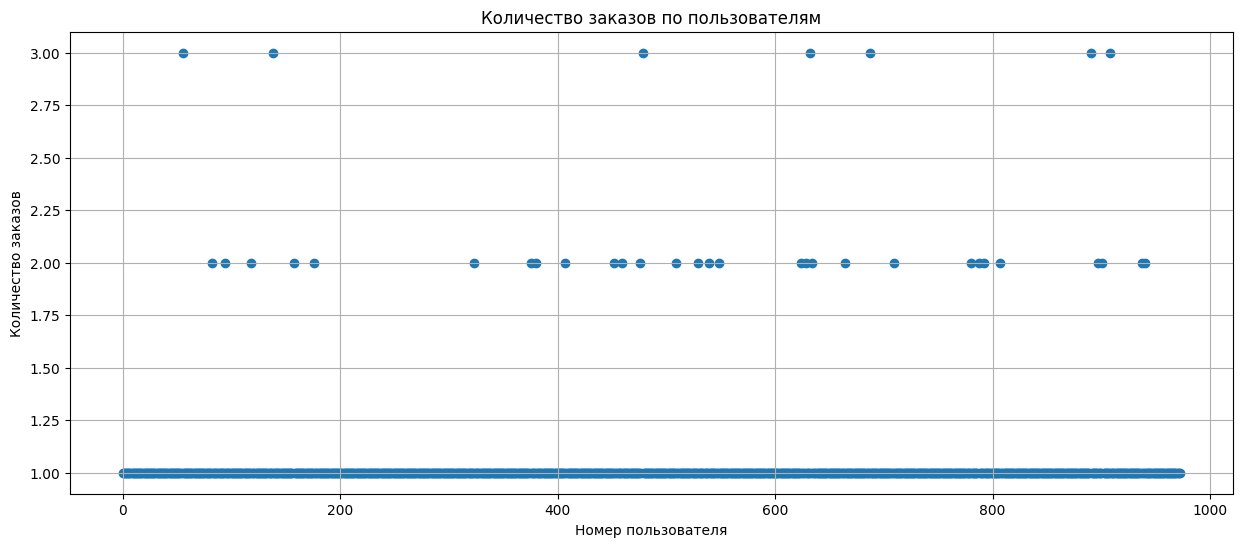

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,6));
plt.title('Количество заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']);

Большинство пользователей совершают не больше 2-3 заказов.

<b>Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выбирем границу для определения аномальных пользователей.</b>

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

<b>Построим точечный график стоимостей заказов</b>

In [30]:
orders['revenue'].describe().apply(lambda x: format(x, 'f'))

count       1016.000000
mean        8300.814961
std        42121.991672
min           50.000000
25%         1190.000000
50%         2955.000000
75%         8134.250000
max      1294500.000000
Name: revenue, dtype: object

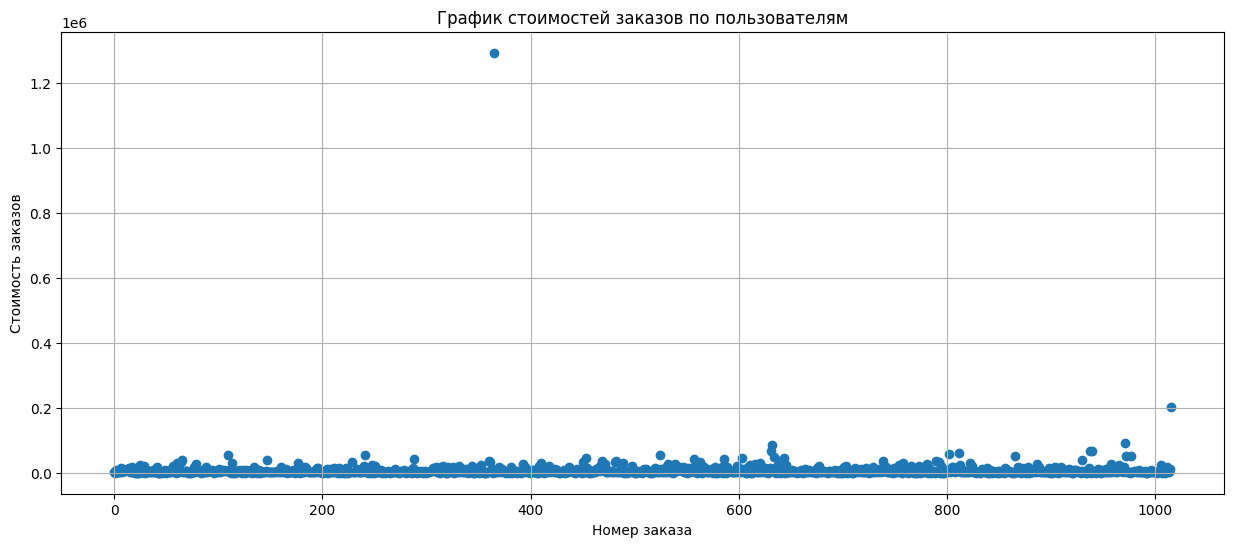

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,6));
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.scatter(x_values, orders['revenue']);

На графике отчетливо виден огромный заказ, который повлиял на поведение наших метрик. Также есть и другие заказы, которые выбиваются из общего числа стоимостей. Построим такой же график только без двух крупных выбросов, поменяем масштаб для наглядности

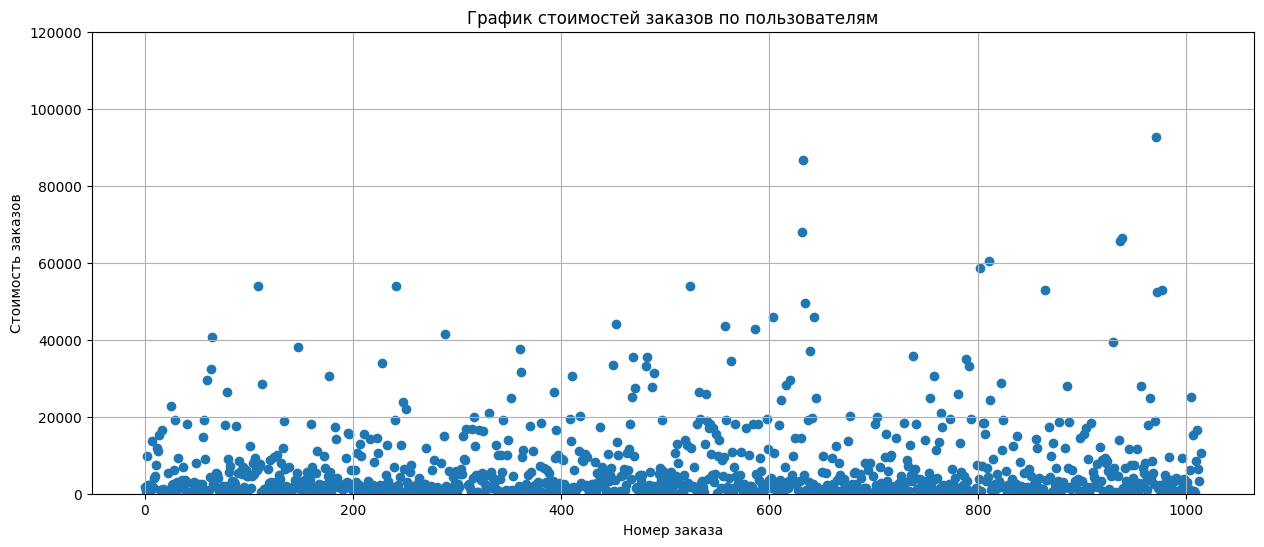

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,6));
plt.ylim(0, 120000)
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.scatter(x_values, orders['revenue']);

Стоиомость большинства заказов не превышает 20000

<b>Посчитаем 95-й и 99-й перцентили стоимости заказов. Выбирем границу для определения аномальных заказов</b>

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов превышают стоимость в 26785, и не более 1% заказов превышают 53904. Возьмем границу по величине 99 процентиля - 53904

<b>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</b>

Оценив результаты А/В-теста визуально мы выяснили, что в данных, скорее всего, есть выбросы. Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:<br>
<b>H0: различий в среднем количестве заказов на посетителя между группами нет</b><br>
<b>Н1: различия в среднем количестве заказов на посетителя между группами есть</b>


Уровень значимости alpha = 0.05

Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Для уровеня значимости установим стандартный уровень статистической значимости, равный 0.05.

Начнем с подготовки данных

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Получилась таблица со следующими строками:


<div>

* <code>date</code> — дата;

* <code>ordersPerDateA</code> — количество заказов в выбранную дату в группе A;

* <code>revenuePerDateA</code> — суммарная выручка в выбранную дату в группе A;

* <code>ordersPerDateB</code> — количество заказов в выбранную дату в группе B;
    
* <code>revenuePerDateB</code> — суммарная выручка в выбранную дату в группе B;
    
* <code>ordersCummulativeA</code> — суммарное число заказов до выбранной даты включительно в группе A;

* <code>revenueCummulativeA</code> — суммарная выручка до выбранной даты включительно в группе A;

* <code>ordersCummulativeB</code> — суммарное количество заказов до выбранной даты включительно в группе B;

* <code>revenueCummulativeB</code> — уммарная выручка до выбранной даты включительно в группе B;
    
* <code>visitorsPerDateA</code> — количество пользователей в выбранную дату в группе A;
    
* <code>visitorsPerDateB</code> — количество пользователей в выбранную дату в группе B;

* <code>visitorsCummulativeA</code> — количество пользователей до выбранной даты включительно в группе A;

* <code>visitorsCummulativeB</code> — количество пользователей до выбранной даты включительно в группе B.

</div>

Создадим переменные <code>ordersByUsersA</code> и <code>ordersByUsersB</code> со столбцами <code>['visitor_id', 'orders']</code>. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные <code>sampleA</code> и <code>sampleB</code>, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

Создадим функцию для проверки стат значимости со следующими параметрами:

<div>

* Установим уровень значимости alpha = 0.05;

* Воспользуемсмя критерием Манна-Уитни;

* Округлим значение p-value до трех знаков после запятой.
    
* Выведем относительный прирост среднего числа заказов группы B: <code>среднее число заказов группы B / среднее число заказов группы A - 1.</code>  Округлим до трёх знаков после запятой.   

</div>

In [37]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [38]:
stat_significance(sampleA, sampleB)

P-value: 0.011
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.980%


По неочищенным данным различия в среднем количестве заказов на посетителя между группами есть.
P-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий между группами нет, отвергаем. Относительный выигрыш группы B равен 16%.

<b>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</b>

Сформулируем гипотезы:<br>
<b>H0: различий в среднем чеке заказа между группами нет</b><br>
<b>Н1: различия в среднем чеке заказа между группами есть</b>

Уровень значимости alpha = 0.05

In [39]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 28.660%


p-value значительно больше alpha, причин отвергнуть нулевую гипотезу у нас нет. Несмотря на это, средний чек группы В на 28% выше чека в группе А.

<b>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. </b>

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 53904. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — <code>users_with_many_orders</code> и пользователей, совершивших заказы дороже 53904 — <code>users_with_expensive_orders</code>. Объединим их в таблице <code>abnormal_users</code>.
Узнаем, сколько всего аномальных пользователей методом <code>shape()</code>.

In [40]:
many_orders = np.percentile(ordersByUsers['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['visitorId'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitorId']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
Name: visitorId, dtype: int64

16

In [41]:
#Посмотрим на относительное значение потерь пользователей после фильтрации
abnormal_users.count() / orders.visitorId.nunique()

0.01644398766700925

Относительное количество потерь пользователей после фильтрации - 1.6 %

Всего у нас 16 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [42]:
sample_a_filtered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [43]:
stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.007
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 18.921%


p-value ниже значения alpha в 0.05, следовательно, отвергаем нулевую гипотезу. На очищенных данных различия в среднем количестве заказов на посетителя группы В к группе А составили 19%.

<b>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным</b>

In [44]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitorId'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitorId'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.788
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -3.234%


p-value выше значения alpha в 0.05, следовательно, не можем отвергнуть нулевую гипотезу. На очищенных данных видим, что разницы между средними чеками составляет 3 процента в пользу группы А

## Выводы

Исходя из предоставленных входных данных интернет-магазина, были проведены исследования, и ниже приведены рекомендации.

<b>Часть 1. Приоретизация гипотез</b>

<br>
Приоритезация гипотез из списка, предоставленного отделом Маркетинга, должна начинаться с гипотез:
<div>

* "Запустить акцию, дающую скидку на товар в день рождения",

* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

</div>

Если при ранжировании гипотез необходимо учитывать охват пользователей интернет-магазина, то места должны быть распределены следующим образом:
<div>

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",

* "Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа",

* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

</div>

<b>Часть 2. Анализ результатов А/В-теста</b>

Анализ А/В теста показал следующее:
<div>

* Между группами есть статистически значимое различие по среднему количеству заказов на посетителя как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В на 16-19% выше, чем у группы А.

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

* График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.

</div>

Основываясь на этом, рекомендуется остановить тест и зафиксировать победу группы В, так как ее среднее количество заказов на посетителя значительно выше, чем у группы А.